# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Neve Foresti
- Emily Chou
- Sahba Mobini Farahani
- Belen Romero
- Marie Paris

# Group Members IDs

- A########
- A########
- A########
- A########

# Research Question

*Fill in your research question here*

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb #to run this you will need to type into your terminal: pip install import-ipynb

pd.set_option('precision', 2)
pd.set_option('display.max_rows', 10)

# Data Cleaning

## 1. Preparing University Data (Neve)

First, using the Beautiful Soup package, we created a script to web scrape the 37 pages of ranked public and private [Best Colleges of Niche.com](https://www.niche.com/colleges/search/best-colleges/). 
For pages 1-37, we sent requests to https://www.niche.com/api/renaissance/results/?type=private&type=public&listURL=best-colleges&page=, which contained information about rankings, names, and links to more information about each of the colleges. For each of these colleges, we then added the unique college link to https://www.niche.com/colleges/. For example, https://www.niche.com/colleges/massachusetts-institute-of-technology/. Lastly, we used Beautiful Soup to extract and print all of the undergraduate population and student racial demographic data to a csv. For the few universities that had missing data, we manually searched the university in Niche.com and entered the demographic data.


In [2]:
#get racial demographic data
df_niche = pd.read_csv("datasets/niche4yearpublicprivate.csv")
df_niche.head(5)

ranking                                   name African American Asian  \
0        1  massachusetts-institute-of-technology               6%   25%   
1        2                    stanford-university               6%   20%   
2        3                     harvard-university               6%   20%   
3        4                        yale-university               6%   15%   
4        5                   princeton-university               7%   20%   

  Hispanic International Multiracial Native American Pacific Islander Unknown  \
0      15%           12%          6%              0%               0%      2%   
1      14%           14%         10%              1%               0%      1%   
2      11%            8%          5%              0%               0%      4%   
3      11%           19%          5%              1%               0%      3%   
4       9%           12%          4%              0%               0%      6%   

  White  
0   34%  
1   34%  
2   44%  
3   40%  
4   41%

#### As you can see, there are quite a few things that need to be done. 
1. All of the values in this dataframe are strings. Hence, we need to convert the demographic data to numeric values. 
2. The demographic measurements do not match up with the measurements for the city/county census data. Census data does not have an "international" category, so in order to compare college with county data, we dropped the International category. We recognize that many of the international students may actually fall into the other categories (and hence result in underrepresenting numbers for some races), but there is no way to know. This is a limitation of how demographic data is collected for colleges, so we will be cautious.

In [3]:
#check if any null values. If null,manually enter data from niche.com
df_niche[df_niche.isnull().any(axis=1)]

df_niche = df_niche.drop("International", axis=1)


for indexr, university in df_niche.iterrows():
    sum = 0
    for indexc, newvalue in university.iteritems():
        if "%" in str(newvalue):
            oldvalue = (newvalue)
            newvalue = (float(newvalue.rstrip("%"))) / 100
            df_niche.loc[indexr,indexc] = newvalue
            sum = sum + newvalue #get the sum of all percentages in a row (will not add up to 1.0)
    # Here we want to get the proportion of the demographics to each other (after having removed International)
    for indexc, newvalue in university.iteritems():
        if isinstance(df_niche.loc[indexr,indexc], float):
            #find relative proportion of demographics by diving with row total
            df_niche.loc[indexr,indexc] = round((float(df_niche.loc[indexr,indexc]) / sum),2)

df_800 = df_niche #top 800 #top 800 colleges will be used for analysis 1
df_500 = df_niche.head(500) #top 500 colleges will be used for analysis 2
df_800

ranking                                          name African American  \
0          1         massachusetts-institute-of-technology             0.07   
1          2                           stanford-university             0.07   
2          3                            harvard-university             0.07   
3          4                               yale-university             0.07   
4          5                          princeton-university             0.08   
..       ...                                           ...              ...   
875      876                    houston-baptist-university             0.19   
876      877        school-of-the-art-institute-of-chicago             0.04   
877      878                         seton-hill-university             0.05   
878      879  california-state-university---san-bernardino             0.06   
879      880                            simpson-university             0.04   

    Asian Hispanic Multiracial Native American Pacific Islander Unknown White  
0    0.28     0.17        0.07               0                0    0.02  0.39  
1    0.23     0.16        0.12            0.01                0    0.01   0.4  
2    0.22     0.12        0.06               0                0    0.04  0.49  
3    0.19     0.14        0.06            0.01                0    0.04  0.49  
4    0.23      0.1        0.05               0                0    0.07  0.47  
..    ...      ...         ...             ...              ...     ...   ...  
875   0.1     0.32        0.04               0                0    0.08  0.27  
876  0.16     0.16        0.04               0                0    0.07  0.51  
877  0.01     0.03        0.02               0                0    0.06  0.83  
878  0.06     0.66        0.03               0                0    0.04  0.14  
879  0.04     0.14        0.03            0.03                0    0.11  0.61  

[880 rows x 10 columns]

## 2. Preparing County Data (Emily)

In [4]:
import city_and_county_datasets as citydata
df_cities = citydata.df_cities
df_cities.head(20)
df_counties = citydata.df_counties
df_counties.head(20)

importing Jupyter notebook from city_and_county_datasets.ipynb
============== TOP TEST ===============
                                                 Fact  \
0        Population estimates, July 1, 2018,  (V2018)   
1   Population estimates base, April 1, 2010,  (V2...   
2   Population, percent change - April 1, 2010 (es...   
3                   Population, Census, April 1, 2010   
4                      Persons under 5 years, percent   
..                                                ...   
77                                                 FN   
78                                                NaN   
79                                                  S   
80                                                  X   
81                                                  Z   

                                            Fact Note  \
0                                                 NaN   
1                                                 NaN   
2                                        

NaN values in each column for westmoreland-pa:
Fact           5
Fact Value    20
dtype: int64
NaN values in each column for alameda-ca:
Fact           5
Fact Value    20
dtype: int64
NaN values in each column for cambridge-ma:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for newhaven-ct:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for stanford-ca:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for jacksonville-il:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for westerville-oh:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for whitewater-wi:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for greensburg-pa:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for redding-ca:
Fact          0
Fact Value    0
dtype: int64
NaN values in each column for sanbernardino-ca:
Fact          0
Fact Value    0
dtype: int64
NaN value

African American  Asian  Hispanic  Multiracial  \
middlesex-ma                  0.06   0.12      0.08         0.02   
santaclara-ca                 0.03   0.38      0.26         0.04   
newhaven-ct                   0.15   0.04      0.18         0.02   
delaware-oh                   0.04   0.07      0.03         0.02   
walworth-wi                   0.01   0.01      0.11         0.01   
morgan-il                     0.06   0.01      0.02         0.02   
westmoreland-pa               0.03   0.01      0.01         0.01   
sanbernardino-ca              0.09   0.08      0.53         0.04   
shasta-ca                     0.01   0.03      0.10         0.04   
alameda-ca                    0.11   0.31      0.23         0.05   

                  Native American  Pacific Islander  Unknown  White  
middlesex-ma                 0.00              0.00     0.08   0.72  
santaclara-ca                0.01              0.01     0.21   0.32  
newhaven-ct                  0.01              0.00     0.15   0.63  
delaware-oh                  0.00              0.00     0.02   0.85  
walworth-wi                  0.01              0.00     0.11   0.85  
morgan-il                    0.00              0.00     0.02   0.89  
westmoreland-pa              0.00              0.00     0.01   0.94  
sanbernardino-ca             0.02              0.01     0.47   0.29  
shasta-ca                    0.03              0.00     0.09   0.80  
alameda-ca                   0.01              0.01     0.19   0.32

# Data Analysis & Results

## Analysis 1 (Neve and Emily)
### For the first part of the analysis, we are interested in looking at how racial demographic data of colleges compares with their surrounding county. 

In [49]:
def bar_plot_county_city(county_name, college_name, top_mid_bot, county_color, college_color):
    ind = np.arange(8) 
    width = 0.42

    plt.bar(ind, df_counties.loc[county_name].values, width, label = ""+county_name+" (county)", color = county_color)
    df_temp = (df_800.loc[df_800['name'] == college_name]).drop(columns = ['ranking', 'name'])
    plt.bar(ind + width, df_temp.values[0], width, label = ""+college_name+" (college)", color = college_color)

    plt.xticks(ind + width / 2, df_counties.columns)
    plt.ylabel('Percentage of Total Population')
    plt.title('Ethnicity Percentages for ' + top_mid_bot + ' 3 Ranked County & University')
    plt.legend(loc='best')
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')


In the following bar graphs, the absence of a bar denotes less than 0 percent of the population.

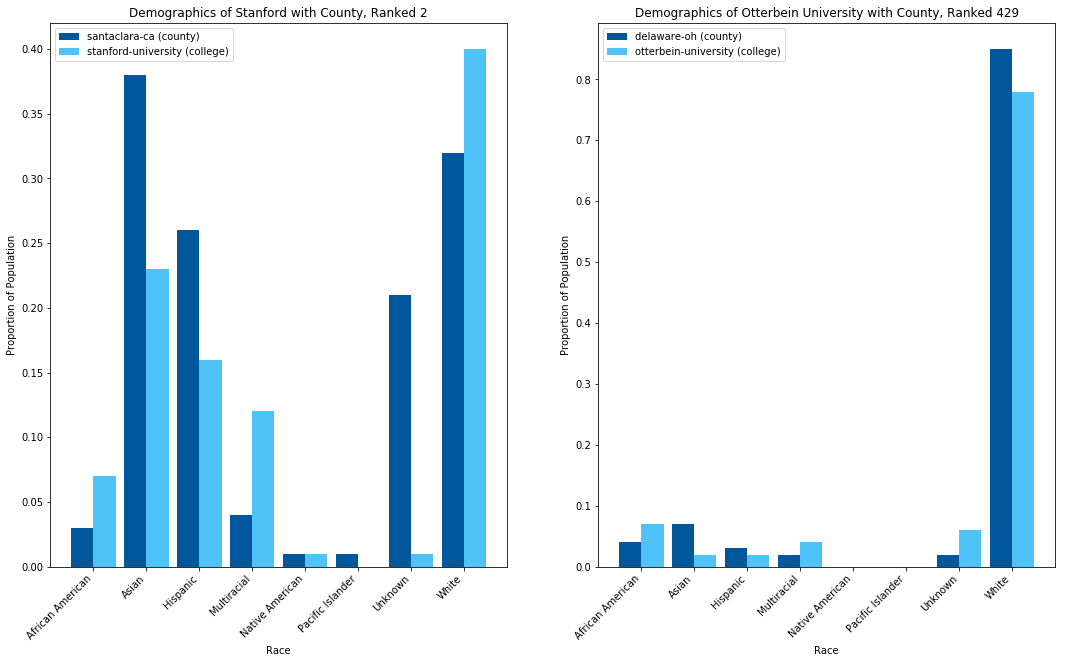

In [54]:
f = plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
bar_plot_county_city('santaclara-ca', 'stanford-university', 'Top', '#01579b', '#4fc3f7')
plt.title("Demographics of Stanford with County, Ranked 2")
plt.xlabel('Race')
plt.ylabel('Proportion of Population')

plt.subplot(1,2,2)
bar_plot_county_city('delaware-oh', 'otterbein-university', 'Middle', '#01579b', '#4fc3f7')
plt.title("Demographics of Otterbein University with County, Ranked 429")
plt.xlabel('Race')
plt.ylabel('Proportion of Population')

plt.show()

The graphs above show the possible variation. Stanford, with a high "Best Colleges" ranking of 2 clearly has racial demographic data very different from the surrounding county. On the other hand, Otterbein University, a college ranked at 429 has less diversity, but has demographics very similar to the surrounding county of Delaware, Ohio.

We are therefore interested in looking at whether ranking is correlated with not only how diverse racial demographics of a campus are, but also how that spread compares with the surrounding city.

## Question: Is there a relationship between the ranking tier (top, middle, bottom) and the similarity between the college and surrounding county demographics?

### We hypothesize that lower ranked schools will have higher demographic similarity with the surrounding county.
By doing a      test.... we expect....

In [5]:
df_topmidbot = df_800[:3]
df_topmidbot = df_topmidbot.append([df_800[428:431], df_800[877:881]])
df_topmidbot = df_topmidbot.drop(columns=["name"])
df_topmidbot.index = df_topmidbot["ranking"]
df_topmidbot

ranking African American Asian Hispanic Multiracial Native American  \
ranking                                                                        
1              1             0.07  0.28     0.17        0.07               0   
2              2             0.07  0.23     0.16        0.12            0.01   
3              3             0.07  0.22     0.12        0.06               0   
429          429             0.07  0.02     0.02        0.04               0   
430          430             0.04  0.02     0.06        0.04               0   
431          431             0.13  0.01     0.09        0.04               0   
878          878             0.05  0.01     0.03        0.02               0   
879          879             0.06  0.06     0.66        0.03               0   
880          880             0.04  0.04     0.14        0.03            0.03   

        Pacific Islander Unknown White  
ranking                                 
1                      0    0.02  0.39  
2                      0    0.01   0.4  
3                      0    0.04  0.49  
429                    0    0.06  0.78  
430                    0       0  0.84  
431                    0       0  0.73  
878                    0    0.06  0.83  
879                    0    0.04  0.14  
880                    0    0.11  0.61

In [10]:

df_topmidbot = df_topmidbot.drop(["Pacific Islander", "Native American"], axis=1)
print(df_topmidbot)
df_topmidbot.ranking = pd.to_numeric(df_topmidbot["ranking"])

         ranking African American Asian Hispanic Multiracial Unknown White
ranking                                                                   
1              1             0.07  0.28     0.17        0.07    0.02  0.39
2              2             0.07  0.23     0.16        0.12    0.01   0.4
3              3             0.07  0.22     0.12        0.06    0.04  0.49
429          429             0.07  0.02     0.02        0.04    0.06  0.78
430          430             0.04  0.02     0.06        0.04       0  0.84
431          431             0.13  0.01     0.09        0.04       0  0.73
878          878             0.05  0.01     0.03        0.02    0.06  0.83
879          879             0.06  0.06     0.66        0.03    0.04  0.14
880          880             0.04  0.04     0.14        0.03    0.11  0.61


In [11]:
df_topmidbot

ranking African American Asian Hispanic Multiracial Unknown White
ranking                                                                   
1              1             0.07  0.28     0.17        0.07    0.02  0.39
2              2             0.07  0.23     0.16        0.12    0.01   0.4
3              3             0.07  0.22     0.12        0.06    0.04  0.49
429          429             0.07  0.02     0.02        0.04    0.06  0.78
430          430             0.04  0.02     0.06        0.04       0  0.84
431          431             0.13  0.01     0.09        0.04       0  0.73
878          878             0.05  0.01     0.03        0.02    0.06  0.83
879          879             0.06  0.06     0.66        0.03    0.04  0.14
880          880             0.04  0.04     0.14        0.03    0.11  0.61

In [12]:
df_new = df_topmidbot.copy(deep=True)
'''df_new["mean"] = df_new.loc[:, ["African American", "Asian", "Hispanic","Multiracial","White"]].mean(axis=1)'''
df_new["var"] =  df_new.loc[:, ["African American", "Asian", "Hispanic","Multiracial","White"]].var(axis=1)

In [13]:
df_new

ranking African American Asian Hispanic Multiracial Unknown White  \
ranking                                                                      
1              1             0.07  0.28     0.17        0.07    0.02  0.39   
2              2             0.07  0.23     0.16        0.12    0.01   0.4   
3              3             0.07  0.22     0.12        0.06    0.04  0.49   
429          429             0.07  0.02     0.02        0.04    0.06  0.78   
430          430             0.04  0.02     0.06        0.04       0  0.84   
431          431             0.13  0.01     0.09        0.04       0  0.73   
878          878             0.05  0.01     0.03        0.02    0.06  0.83   
879          879             0.06  0.06     0.66        0.03    0.04  0.14   
880          880             0.04  0.04     0.14        0.03    0.11  0.61   

          var  
ranking        
1        0.02  
2        0.02  
3        0.03  
429      0.11  
430      0.13  
431      0.09  
878      0.13  
879      0.07  
880      0.06

C:\Users\nevef\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\nevef\Anaconda3\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'ranking' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0, 0.5, 'Diversity Metric')

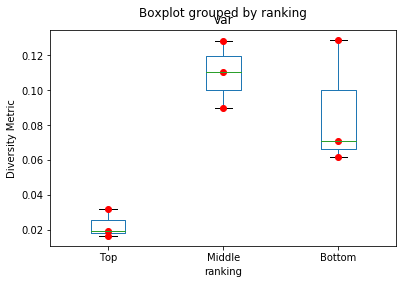

In [14]:
df_new.ranking.loc[(df_new['ranking'] < 4)] = 0
df_new.ranking.loc[(df_new['ranking'] >= 4) & (df_new['ranking'] < 432)] = 1
df_new.ranking.loc[(df_new['ranking'] > 877)] = 2
graph1 = df_new.boxplot(by ='ranking', column =['var'], grid = False) 
plt.plot(df_new["ranking"]+1, df_new["var"],'r.',alpha=1,marker='o')
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
graph1.set_ylabel('Diversity Metric')

In [15]:
df_county = df_counties.drop("alameda-ca")
df_county["ranking"] = [0,0,0,1,1,1,2,2,2]
df_county = df_county.copy(deep=True)
'''df_county["mean"] = df_new.loc[:, ["African American", "Asian", "Hispanic","Multiracial","White"]].mean(axis=1)'''
df_county["var"] =  df_county.loc[:, ["African American", "Asian", "Hispanic","Multiracial","White"]].var(axis=1)

Text(0, 0.5, 'Diversity Metric')

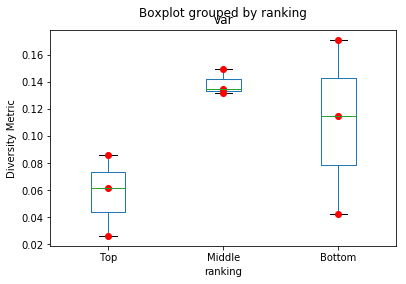

In [16]:
graph2 = df_county.boxplot(by ='ranking', column =['var'], grid = False) 
plt.plot(df_county["ranking"]+1, df_county["var"],'r.',alpha=1,marker='o')
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
graph2.set_ylabel('Diversity Metric')

In [17]:
def diff_county_college(county_name, college_name, dataframe,top_mid_bot):
    ranking = df_800.loc[df_800['name'] == college_name].ranking
    df_temp = (df_800.loc[df_800['name'] == college_name]).drop(columns = ['ranking', 'name'])
    dataframe = dataframe.append(df_counties.loc[county_name].values - df_temp)
    return dataframe

    
topdiff = pd.DataFrame()
topdiff = diff_county_college('middlesex-ma', 'massachusetts-institute-of-technology',topdiff,"Top")
topdiff = diff_county_college('santaclara-ca', 'stanford-university',topdiff,"Top")
topdiff = diff_county_college('middlesex-ma', 'harvard-university',topdiff,"Top")
topdiff = diff_county_college('delaware-oh', 'otterbein-university',topdiff,"Middle")
topdiff = diff_county_college('walworth-wi', 'university-of-wisconsin---whitewater',topdiff,"Middle")
topdiff = diff_county_college('morgan-il', 'illinois-college',topdiff,"Middle")
topdiff = diff_county_college('westmoreland-pa', 'seton-hill-university',topdiff,"Bottom")
topdiff = diff_county_college('sanbernardino-ca', 'california-state-university---san-bernardino',topdiff,"Bottom")
topdiff = diff_county_college('shasta-ca', 'simpson-university',topdiff,"Bottom")
topdiff = topdiff.drop(columns=["Native American", "Pacific Islander", "Unknown"])
topdiff["ranking"] = topdiff.index + 1


In [18]:
topdiff.ranking = pd.to_numeric(topdiff["ranking"])
topdiff.White = pd.to_numeric(topdiff["White"])
topdiff.Hispanic = pd.to_numeric(topdiff["Hispanic"])
topdiff.Multiracial = pd.to_numeric(topdiff["Multiracial"])
topdiff.Asian = pd.to_numeric(topdiff["Asian"])
topdiff["African American"] = pd.to_numeric(topdiff["African American"])
topdiff

African American  Asian  Hispanic  Multiracial  White  ranking
0               -0.01  -0.16 -9.00e-02        -0.05   0.33        1
1               -0.04   0.15  1.00e-01        -0.08  -0.08        2
2               -0.01  -0.10 -4.00e-02        -0.04   0.23        3
428             -0.03   0.05  1.00e-02        -0.02   0.07      429
429             -0.03  -0.01  5.00e-02        -0.03   0.01      430
430             -0.07   0.00 -7.00e-02        -0.02   0.16      431
877             -0.02   0.00 -2.00e-02        -0.01   0.11      878
878              0.03   0.02 -1.30e-01         0.01   0.15      879
879             -0.03  -0.01 -4.00e-02         0.01   0.19      880

In [19]:
'''plt.scatter(x=topdiff["ranking"], y=topdiff["Multiracial"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["White"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Asian"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["African American"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Hispanic"],s = 100)
plt.legend()'''

'plt.scatter(x=topdiff["ranking"], y=topdiff["Multiracial"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["White"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["Asian"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["African American"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["Hispanic"],s = 100)\nplt.legend()'

In [20]:
#topdiff = topdiff.abs()
'''plt.scatter(x=topdiff["ranking"], y=topdiff["Multiracial"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["White"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Asian"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["African American"],s = 100)
plt.scatter(x=topdiff["ranking"], y=topdiff["Hispanic"], s = 100)
plt.legend()
'''

'plt.scatter(x=topdiff["ranking"], y=topdiff["Multiracial"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["White"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["Asian"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["African American"],s = 100)\nplt.scatter(x=topdiff["ranking"], y=topdiff["Hispanic"], s = 100)\nplt.legend()\n'

In [21]:
topdiffdesc = topdiff.drop("ranking", axis=1)

topdiffdesc = topdiffdesc.transpose()
print(topdiffdesc.describe())
transummary = topdiffdesc.describe().transpose()

            0         1         2         428       429       430   877   878  \
count  5.00e+00  5.00e+00  5.00e+00  5.00e+00  5.00e+00  5.00e+00  5.00  5.00   
mean   4.00e-03  1.00e-02  8.00e-03  1.60e-02 -2.00e-03  5.55e-18  0.01  0.02   
std    1.90e-01  1.08e-01  1.28e-01  4.34e-02  3.35e-02  9.46e-02  0.06  0.10   
min   -1.60e-01 -8.00e-02 -1.00e-01 -3.00e-02 -3.00e-02 -7.00e-02 -0.02 -0.13   
25%   -9.00e-02 -8.00e-02 -4.00e-02 -2.00e-02 -3.00e-02 -7.00e-02 -0.02  0.01   
50%   -5.00e-02 -4.00e-02 -4.00e-02  1.00e-02 -1.00e-02 -2.00e-02 -0.01  0.02   
75%   -1.00e-02  1.00e-01 -1.00e-02  5.00e-02  1.00e-02  0.00e+00  0.00  0.03   
max    3.30e-01  1.50e-01  2.30e-01  7.00e-02  5.00e-02  1.60e-01  0.11  0.15   

        879  
count  5.00  
mean   0.02  
std    0.09  
min   -0.04  
25%   -0.03  
50%   -0.01  
75%    0.01  
max    0.19  


In [22]:
df_summary = topdiff.copy(deep=True)
df_summary.ranking.loc[(df_summary['ranking'] < 4)] = 0
df_summary.ranking.loc[(df_summary['ranking'] >= 4) & (df_summary['ranking'] < 432)] = 1
df_summary.ranking.loc[(df_summary['ranking'] > 877)] = 2


df_summary["mean"] = transummary["mean"]

In [23]:
df_summary

African American  Asian  Hispanic  Multiracial  White  ranking      mean
0               -0.01  -0.16 -9.00e-02        -0.05   0.33        0  4.00e-03
1               -0.04   0.15  1.00e-01        -0.08  -0.08        0  1.00e-02
2               -0.01  -0.10 -4.00e-02        -0.04   0.23        0  8.00e-03
428             -0.03   0.05  1.00e-02        -0.02   0.07        1  1.60e-02
429             -0.03  -0.01  5.00e-02        -0.03   0.01        1 -2.00e-03
430             -0.07   0.00 -7.00e-02        -0.02   0.16        1  5.55e-18
877             -0.02   0.00 -2.00e-02        -0.01   0.11        2  1.20e-02
878              0.03   0.02 -1.30e-01         0.01   0.15        2  1.60e-02
879             -0.03  -0.01 -4.00e-02         0.01   0.19        2  2.40e-02

Text(0, 0.5, 'Absolute Value of Difference between College and Surrounding County')

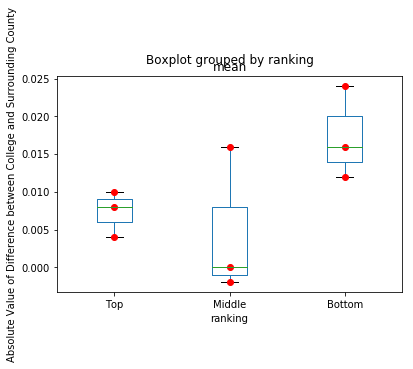

In [24]:
graph3 = df_summary.boxplot(by ='ranking', column =['mean'], grid = False) 
plt.plot(df_summary["ranking"]+1, df_summary["mean"],'r.',alpha=1,marker='o')
plt.xticks([1, 2, 3], ['Top', 'Middle', 'Bottom'])
graph3.set_ylabel('Absolute Value of Difference between College and Surrounding County')

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*